<h1>Análise de ações</h1>

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import pandas as pd
import re
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


<h3>Primeiro importar o dataset</h3>

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/trabalho_2_mineracao/2020closePrice SAX-240_60_10.csv')
df

Unnamed: 0  1  2  3  4  5  6  7  8  9 10  ... 35 36 37 38 39 40 41 42 43 44 45
0            1  a  j  b  c  j  j  g  g  j  j  ...  j  j  f  j  d  j  g  e  j  c  j
1            2  a  j  b  c  j  j  i  g  j  j  ...  j  j  f  j  f  j  g  e  j  c  j
2            3  a  j  c  c  j  j  j  g  j  j  ...  j  j  g  j  f  j  g  e  j  d  j
3            4  a  j  d  d  j  j  j  g  j  j  ...  j  j  i  j  f  j  h  e  j  e  j
4            5  a  j  c  d  j  j  f  g  j  j  ...  j  j  i  i  e  j  h  d  j  e  j
5            6  a  j  c  e  j  j  f  g  j  j  ...  j  j  i  i  c  j  g  d  j  e  j
6            7  a  j  c  d  j  j  e  g  j  j  ...  j  h  i  i  c  j  g  d  j  e  j
7            8  a  i  c  e  j  j  e  h  j  j  ...  j  i  i  i  d  j  g  d  j  f  j
8            9  b  i  c  f  j  j  g  g  j  j  ...  j  i  i  i  d  i  g  d  j  f  j
9           10  b  g  b  e  j  j  f  e  i  i  ...  i  i  h  g  c  f  e  b  i  e  j
10          11  b  h  b  d  i  i  e  d  i  h  ...  h  h  g  d  d  e  e  b  i  e  i
11          12  b  e  a  b  f  f  a  a  e  c  ...  a  d  a  a  b  b  c  a  e  b  g
12          13  b  b  a  a  c  e  a  a  b  a  ...  a  b  a  a  a  a  b  a  b  a  d
13          14  b  b  a  a  a  b  a  a  a  a  ...  a  a  a  a  a  a  a  a  a  a  b
14          15  b  c  a  a  c  d  a  a  a  b  ...  a  b  a  c  a  a  a  a  b  a  c
15          16  c  b  a  a  b  c  a  a  a  b  ...  a  b  a  c  c  a  a  a  a  a  c
16          17  c  b  a  a  c  d  a  a  b  b  ...  b  b  b  c  b  a  a  b  b  a  c
17          18  c  b  b  a  c  e  b  a  b  c  ...  b  b  b  c  b  a  a  b  d  a  c
18          19  c  b  c  b  b  d  b  a  b  c  ...  b  b  a  d  b  a  a  a  d  a  d
19          20  c  b  c  a  b  c  e  a  b  d  ...  b  b  a  d  c  b  a  b  d  a  d
20          21  c  b  d  a  b  b  g  a  c  c  ...  b  c  a  c  d  a  a  b  d  b  b
21          22  d  b  f  a  b  b  i  a  b  d  ...  b  b  a  c  h  a  a  b  c  b  a
22          23  d  b  f  a  b  b  i  a  b  f  ...  b  b  a  d  g  b  a  c  c  b  a
23          24  d  b  f  b  b  b  h  a  c  e  ...  c  b  b  d  c  b  a  d  c  b  a
24          25  d  c  g  c  c  b  h  b  e  f  ...  c  c  c  g  c  c  b  c  c  c  b
25          26  d  c  f  d  d  c  h  b  f  f  ...  d  d  d  h  c  d  c  d  d  d  d
26          27  e  f  f  e  f  e  h  d  g  f  ...  e  f  e  i  c  e  c  e  f  f  f
27          28  e  e  h  e  e  d  h  d  f  e  ...  e  f  d  i  c  d  c  e  f  f  f
28          29  e  e  i  e  e  d  h  f  f  f  ...  e  f  e  i  c  e  c  e  f  f  f
29          30  e  e  i  g  d  c  h  g  e  e  ...  e  f  e  i  c  d  d  e  g  e  f
30          31  f  f  i  h  d  c  h  g  e  d  ...  e  e  e  h  b  e  d  e  g  f  f
31          32  f  f  j  h  e  d  i  h  f  d  ...  f  g  f  h  b  e  d  e  h  f  f
32          33  f  f  j  i  e  d  h  i  f  d  ...  f  f  f  h  b  e  d  f  h  h  f
33          34  f  f  j  j  e  d  i  i  f  d  ...  f  f  g  i  c  f  d  g  g  i  f
34          35  g  g  j  j  e  e  i  i  g  d  ...  f  f  g  h  d  f  d  g  g  i  e
35          36  g  g  j  j  e  e  i  i  f  e  ...  f  f  g  h  e  f  e  g  f  i  e
36          37  g  e  j  j  e  d  h  i  e  d  ...  f  f  g  g  e  e  e  g  f  i  e
37          38  g  d  j  j  e  d  h  i  e  e  ...  f  f  h  h  h  e  e  g  e  i  e
38          39  g  d  j  i  d  c  h  h  d  e  ...  f  e  h  g  i  e  f  g  e  h  e
39          40  h  d  j  i  d  c  i  i  e  d  ...  f  e  i  h  j  f  g  h  e  i  e
40          41  h  c  j  i  d  c  i  h  e  d  ...  f  e  h  h  j  f  g  g  e  i  f
41          42  h  c  j  i  d  c  h  h  e  d  ...  f  e  h  h  i  g  h  g  d  i  e
42          43  h  c  h  h  e  d  g  h  f  d  ...  f  e  h  g  h  h  h  g  d  i  e
43          44  h  c  h  h  d  c  h  h  e  d  ...  e  d  g  f  h  h  h  g  c  h  d
44          45  h  c  h  h  d  c  h  g  e  e  ...  e  d  f  e  i  i  i  g  c  h  d
45          46  i  c  g  h  c  c  f  g  d  d  ...  d  d  e  e  h  h  h  f  c  h  c
46          47  i  c  f  g  c  b  e  f  d  c  ...  c  d  e  c  h  f  g  f  c  h  c
47          48  i  d

<h3>Remover colunas que não são necessárias</h3>

In [ ]:
df = df.drop(['Unnamed: 0', '1'], 1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


2  3  4  5  6  7  8  9 10 11 12 13  ... 34 35 36 37 38 39 40 41 42 43 44 45
0   j  b  c  j  j  g  g  j  j  j  b  j  ...  j  j  j  f  j  d  j  g  e  j  c  j
1   j  b  c  j  j  i  g  j  j  j  b  j  ...  j  j  j  f  j  f  j  g  e  j  c  j
2   j  c  c  j  j  j  g  j  j  j  c  j  ...  j  j  j  g  j  f  j  g  e  j  d  j
3   j  d  d  j  j  j  g  j  j  j  d  j  ...  j  j  j  i  j  f  j  h  e  j  e  j
4   j  c  d  j  j  f  g  j  j  j  c  j  ...  j  j  j  i  i  e  j  h  d  j  e  j
5   j  c  e  j  j  f  g  j  j  j  c  j  ...  j  j  j  i  i  c  j  g  d  j  e  j
6   j  c  d  j  j  e  g  j  j  j  c  j  ...  j  j  h  i  i  c  j  g  d  j  e  j
7   i  c  e  j  j  e  h  j  j  j  c  j  ...  j  j  i  i  i  d  j  g  d  j  f  j
8   i  c  f  j  j  g  g  j  j  j  c  j  ...  j  j  i  i  i  d  i  g  d  j  f  j
9   g  b  e  j  j  f  e  i  i  j  b  i  ...  i  i  i  h  g  c  f  e  b  i  e  j
10  h  b  d  i  i  e  d  i  h  j  b  h  ...  h  h  h  g  d  d  e  e  b  i  e  i
11  e  a  b  f  f  a  a  e  c  g  a  d  ...  a  a  d  a  a  b  b  c  a  e  b  g
12  b  a  a  c  e  a  a  b  a  d  a  b  ...  a  a  b  a  a  a  a  b  a  b  a  d
13  b  a  a  a  b  a  a  a  a  b  a  a  ...  a  a  a  a  a  a  a  a  a  a  a  b
14  c  a  a  c  d  a  a  a  b  e  a  c  ...  a  a  b  a  c  a  a  a  a  b  a  c
15  b  a  a  b  c  a  a  a  b  c  a  b  ...  a  a  b  a  c  c  a  a  a  a  a  c
16  b  a  a  c  d  a  a  b  b  c  a  b  ...  b  b  b  b  c  b  a  a  b  b  a  c
17  b  b  a  c  e  b  a  b  c  c  b  c  ...  b  b  b  b  c  b  a  a  b  d  a  c
18  b  c  b  b  d  b  a  b  c  d  c  c  ...  b  b  b  a  d  b  a  a  a  d  a  d
19  b  c  a  b  c  e  a  b  d  d  c  c  ...  b  b  b  a  d  c  b  a  b  d  a  d
20  b  d  a  b  b  g  a  c  c  c  d  b  ...  b  b  c  a  c  d  a  a  b  d  b  b
21  b  f  a  b  b  i  a  b  d  b  f  a  ...  c  b  b  a  c  h  a  a  b  c  b  a
22  b  f  a  b  b  i  a  b  f  b  f  a  ...  b  b  b  a  d  g  b  a  c  c  b  a
23  b  f  b  b  b  h  a  c  e  c  f  d  ...  c  c  b  b  d  c  b  a  d  c  b  a
24  c  g  c  c  b  h  b  e  f  d  g  f  ...  d  c  c  c  g  c  c  b  c  c  c  b
25  c  f  d  d  c  h  b  f  f  d  f  f  ...  d  d  d  d  h  c  d  c  d  d  d  d
26  f  f  e  f  e  h  d  g  f  e  f  f  ...  e  e  f  e  i  c  e  c  e  f  f  f
27  e  h  e  e  d  h  d  f  e  e  h  f  ...  e  e  f  d  i  c  d  c  e  f  f  f
28  e  i  e  e  d  h  f  f  f  e  i  f  ...  e  e  f  e  i  c  e  c  e  f  f  f
29  e  i  g  d  c  h  g  e  e  d  i  g  ...  e  e  f  e  i  c  d  d  e  g  e  f
30  f  i  h  d  c  h  g  e  d  d  i  f  ...  e  e  e  e  h  b  e  d  e  g  f  f
31  f  j  h  e  d  i  h  f  d  e  j  g  ...  f  f  g  f  h  b  e  d  e  h  f  f
32  f  j  i  e  d  h  i  f  d  e  j  f  ...  f  f  f  f  h  b  e  d  f  h  h  f
33  f  j  j  e  d  i  i  f  d  e  j  f  ...  f  f  f  g  i  c  f  d  g  g  i  f
34  g  j  j  e  e  i  i  g  d  e  j  f  ...  f  f  f  g  h  d  f  d  g  g  i  e
35  g  j  j  e  e  i  i  f  e  d  j  f  ...  f  f  f  g  h  e  f  e  g  f  i  e
36  e  j  j  e  d  h  i  e  d  d  j  f  ...  e  f  f  g  g  e  e  e  g  f  i  e
37  d  j  j  e  d  h  i  e  e  e  j  f  ...  f  f  f  h  h  h  e  e  g  e  i  e
38  d  j  i  d  c  h  h  d  e  d  j  d  ...  f  f  e  h  g  i  e  f  g  e  h  e
39  d  j  i  d  c  i  i  e  d  d  j  d  ...  f  f  e  i  h  j  f  g  h  e  i  e
40  c  j  i  d  c  i  h  e  d  c  j  d  ...  f  f  e  h  h  j  f  g  g  e  i  f
41  c  j  i  d  c  h  h  e  d  c  j  e  ...  f  f  e  h  h  i  g  h  g  d  i  e
42  c  h  h  e  d  g  h  f  d  c  h  f  ...  f  f  e  h  g  h  h  h  g  d  i  e
43  c  h  h  d  c  h  h  e  d  c  h  f  ...  e  e  d  g  f  h  h  h  g  c  h  d
44  c  h  h  d  c  h  g  e  e  c  h  e  ...  e  e  d  f  e  i  i  i  g  c  h  d
45  c  g  h  c  c  f  g  d  d  c  g  e  ...  d  d  d  e  e  h  h  h  f  c  h  c
46  c  f  g  c  b  e  f  d  c  b  f  c  ...  c  c  d  e  c  h  f  g  f  c  h  c
47  d  f  g  c  c  d  g  c  c  c  f  c  ...  c  c  d  e  b  h  e  h  g  c  h  c
48  e  g  g  c  c  d  g  d  c  c  g  c  ...  c  d  d  f  a  i  e  h  h  c  i  d
49  

<h3>Abrir e ler .txt com nome das ações</h3>

In [ ]:
with open('drive/MyDrive/Colab Notebooks/trabalho_2_mineracao/TopAcoes.txt') as f:
  acoes = re.split(r'\s{2,}', f.read())
print(acoes)

['ABEV3.SA', 'AMER3.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC4.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CSNA3.SA', 'CYRE3.SA', 'EMBR3.SA', 'FNOR11.SA', 'HAPV3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'LAME4.SA', 'LCAM3.SA', 'LINX3.SA', 'LREN3.SA', 'MGLU3.SA', 'MRVE3.SA', 'OIBR3.SA', 'PETR3.SA', 'PETR4.SA', 'POSI3.SA', 'PRIO3.SA', 'RAIL3.SA', 'SUZB3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVR3.SA', 'VVAR3.SA', 'WIZS3.SA']


<h3>Adicionar os nomes das ações como nome das colunas</h3>

In [ ]:
df.columns = df.columns[:0].tolist() + acoes
df

ABEV3.SA AMER3.SA B3SA3.SA BBAS3.SA  ... VALE3.SA VIVR3.SA VVAR3.SA WIZS3.SA
0         j        b        c        j  ...        e        j        c        j
1         j        b        c        j  ...        e        j        c        j
2         j        c        c        j  ...        e        j        d        j
3         j        d        d        j  ...        e        j        e        j
4         j        c        d        j  ...        d        j        e        j
5         j        c        e        j  ...        d        j        e        j
6         j        c        d        j  ...        d        j        e        j
7         i        c        e        j  ...        d        j        f        j
8         i        c        f        j  ...        d        j        f        j
9         g        b        e        j  ...        b        i        e        j
10        h        b        d        i  ...        b        i        e        i
11        e        a        b        f  ...        a        e        b        g
12        b        a        a        c  ...        a        b        a        d
13        b        a        a        a  ...        a        a        a        b
14        c        a        a        c  ...        a        b        a        c
15        b        a        a        b  ...        a        a        a        c
16        b        a        a        c  ...        b        b        a        c
17        b        b        a        c  ...        b        d        a        c
18        b        c        b        b  ...        a        d        a        d
19        b        c        a        b  ...        b        d        a        d
20        b        d        a        b  ...        b        d        b        b
21        b        f        a        b  ...        b        c        b        a
22        b        f        a        b  ...        c        c        b        a
23        b        f        b        b  ...        d        c        b        a
24        c        g        c        c  ...        c        c        c        b
25        c        f        d        d  ...        d        d        d        d
26        f        f        e        f  ...        e        f        f        f
27        e        h        e        e  ...        e        f        f        f
28        e        i        e        e  ...        e        f        f        f
29        e        i        g        d  ...        e        g        e        f
30        f        i        h        d  ...        e        g        f        f
31        f        j        h        e  ...        e        h        f        f
32        f        j        i        e  ...        f        h        h        f
33        f        j        j        e  ...        g        g        i        f
34        g        j        j        e  ...        g        g        i        e
35        g        j        j        e  ...        g        f        i        e
36        e        j        j        e  ...        g        f        i        e
37        d        j        j        e  ...        g        e        i        e
38        d        j        i        d  ...        g        e        h        e
39        d        j        i        d  ...        h        e        i        e
40        c        j        i        d  ...        g        e        i        f
41        c        j        i        d  ...        g        d        i        e
42        c        h        h        e  ...        g        d        i        e
43        c        h        h        d  ...        g        c        h        d
44        c        h        h        d  ...        g        c        h        d
45        c        g        h        c  ...        f        c        h        c
46        c        f        g        c  ...        f        c        h        c
47        d        f        g        c  ...        g        c        h        c
48        e        g        g        c  ...        h        c        i        d
49 

<h3> Se tiver entre {a...e} é 1 (abaixo da média). Se for o resto é 0 (acima da média)</h3>

In [ ]:
# 0 = acima da média, 1 = abaixo da média

df_onehot = df.copy()

for column in df_onehot:
  mask = (df_onehot[column] <= 'e' )
  df_onehot[column] = np.where(mask, 1, 0)
df_onehot

ABEV3.SA  AMER3.SA  B3SA3.SA  ...  VIVR3.SA  VVAR3.SA  WIZS3.SA
0          0         1         1  ...         0         1         0
1          0         1         1  ...         0         1         0
2          0         1         1  ...         0         1         0
3          0         1         1  ...         0         1         0
4          0         1         1  ...         0         1         0
5          0         1         1  ...         0         1         0
6          0         1         1  ...         0         1         0
7          0         1         1  ...         0         0         0
8          0         1         0  ...         0         0         0
9          0         1         1  ...         0         1         0
10         0         1         1  ...         0         1         0
11         1         1         1  ...         1         1         0
12         1         1         1  ...         1         1         1
13         1         1         1  ...         1         1         1
14         1         1         1  ...         1         1         1
15         1         1         1  ...         1         1         1
16         1         1         1  ...         1         1         1
17         1         1         1  ...         1         1         1
18         1         1         1  ...         1         1         1
19         1         1         1  ...         1         1         1
20         1         1         1  ...         1         1         1
21         1         0         1  ...         1         1         1
22         1         0         1  ...         1         1         1
23         1         0         1  ...         1         1         1
24         1         0         1  ...         1         1         1
25         1         0         1  ...         1         1         1
26         0         0         1  ...         0         0         0
27         1         0         1  ...         0         0         0
28         1         0         1  ...         0         0         0
29         1         0         0  ...         0         1         0
30         0         0         0  ...         0         0         0
31         0         0         0  ...         0         0         0
32         0         0         0  ...         0         0         0
33         0         0         0  ...         0         0         0
34         0         0         0  ...         0         0         1
35         0         0         0  ...         0         0         1
36         1         0         0  ...         0         0         1
37         1         0         0  ...         1         0         1
38         1         0         0  ...         1         0         1
39         1         0         0  ...         1         0         1
40         1         0         0  ...         1         0         0
41         1         0         0  ...         1         0         1
42         1         0         0  ...         1         0         1
43         1         0         0  ...         1         0         1
44         1         0         0  ...         1         0         1
45         1         0         0  ...         1         0         1
46         1         0         0  ...         1         0         1
47         1         0         0  ...         1         0         1
48         1         0         0  ...         1         0         1
49         1         0         0  ...         1         0         1
50         1         0         0  ...         1         0         1
51         1         1         0  ...         1         0         1
52         1         1         0  ...         1         0         1
53         0         1         0  ...         1         0         1
54         0         1         0  ...         1         0         1
55         0         1         0  ...         1         0         1
56         0         1         0  ...         1         0         1
57         0         1         0  ...         1         0   

<h3>Classe Apriori</h3>

In [ ]:
class Apriori:
    """Classe Apriori."""
    suporte = 0.5
    df = None

    def __init__(self, df, suporte=None, transform_bol=False):
        """Construtor. 

        :param pandas.DataFrame df: dataframe OneHot Encode.
        :param float suporte: suporte para min_support.
        :return: Instância Apriori.
        :rtype: Apriori
        """

        self._validar_df(df)

        self.df = df
        if suporte is not None:
            self.suporte = suporte

        if transform_bol:
            self._transform_bol()

    def _validar_df(self, df=None):
        """Validade se df existe. 

        :param pandas.DataFrame df: dataframe OneHot Encode.
        :return: 
        :rtype: void
        """

        if df is None:
            raise Exception("df deve ser um pandas.DataDrame válido.")


    def _transform_bol(self):
        """Transformar dataframe OneHot Encode para (True ou False). 

        :return: 
        :rtype: void
        """

        for coluna in self.df.columns:
            self.df[coluna] = self.df[coluna].apply(lambda x: True if x == 1 else False)


    def _apriori(self, use_colnames=False, max_len=None, count=True):
        """Chama a função apriori do mlxtend.frequent_patterns. 

        :param bool use_colnames: Flag para usar o nome das colunas no dataframe.
        :param int max_len: Tamanho máximo de itemsets gerados.
        :param bool count: Flag para contar o número de itemsets.
        :return: apriori DataFrame.
        :rtype: pandas.DataFrame
        """
    
        apriori_df = apriori(
                    self.df, 
                    min_support=self.suporte,
                    use_colnames=use_colnames, 
                    max_len=max_len
                )

        if count:
            apriori_df['length'] = apriori_df['itemsets'].apply(lambda x: len(x))

        return apriori_df

    def run(self, use_colnames=False, max_len=None, count=True):
        """ Execução Apriori.

        :param bool use_colnames: Flag para usar o nome das colunas no dataframe.
        :param int max_len: Tamanho máximo de itemsets gerados.
        :param bool count: Flag para contar o número de itemsets.
        :return: apriori DataFrame.
        :rtype: pandas.DataFrame
        """

        return self._apriori(
                        use_colnames=use_colnames,
                        max_len=max_len,
                        count=count
                    )

    def filter(self, apriori_df, tamanho, suporte):
        """Filtrar o dataframe Apriori por tamanho e suporte.

        :param pandas.DataFrame apriori_df: Apriori DataFrame.
        :param int length: Length of itemsets required.
        :param float threshold: Minimum threshold nrequired.
        :return: apriori filtered DataFrame.
        :rtype:pandas.DataFrame
        """
        
        if 'length' not in apriori_df.columns:
            raise Exception("apriori_df não tem atributo tamanho. Por favor execute o Apriori com count=True.")

        return apriori_df[ (apriori_df['length'] >= tamanho) & (apriori_df['support'] >= suporte) ]

    def association_rules(self, apriori_df, conf):
      return association_rules(apriori_df, metric="confidence", min_threshold=conf)

In [ ]:

df_apriori =  df_onehot
apriori_runner = Apriori(df_apriori, suporte=0.75, transform_bol=True)
df_apriori = apriori_runner.run(use_colnames=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_apriori

support                        itemsets  length
0  0.800000                      (BRML3.SA)       1
1  0.783333                      (EMBR3.SA)       1
2  0.816667                      (IRBR3.SA)       1
3  0.783333            (BRML3.SA, EMBR3.SA)       2
4  0.800000            (BRML3.SA, IRBR3.SA)       2
5  0.783333            (EMBR3.SA, IRBR3.SA)       2
6  0.783333  (BRML3.SA, IRBR3.SA, EMBR3.SA)       3

In [ ]:
df_acoes = apriori_runner.association_rules(df_apriori, conf=0.8)
df_acoes

antecedents           consequents  antecedent support  \
0             (BRML3.SA)            (EMBR3.SA)            0.800000   
1             (EMBR3.SA)            (BRML3.SA)            0.783333   
2             (BRML3.SA)            (IRBR3.SA)            0.800000   
3             (IRBR3.SA)            (BRML3.SA)            0.816667   
4             (EMBR3.SA)            (IRBR3.SA)            0.783333   
5             (IRBR3.SA)            (EMBR3.SA)            0.816667   
6   (BRML3.SA, IRBR3.SA)            (EMBR3.SA)            0.800000   
7   (BRML3.SA, EMBR3.SA)            (IRBR3.SA)            0.783333   
8   (EMBR3.SA, IRBR3.SA)            (BRML3.SA)            0.783333   
9             (BRML3.SA)  (EMBR3.SA, IRBR3.SA)            0.800000   
10            (IRBR3.SA)  (BRML3.SA, EMBR3.SA)            0.816667   
11            (EMBR3.SA)  (BRML3.SA, IRBR3.SA)            0.783333   

    consequent support   support  confidence     lift  leverage  conviction  
0             0.783333  0.783333    0.979167  1.25000  0.156667   10.400000  
1             0.800000  0.783333    1.000000  1.25000  0.156667         inf  
2             0.816667  0.800000    1.000000  1.22449  0.146667         inf  
3             0.800000  0.800000    0.979592  1.22449  0.146667    9.800000  
4             0.816667  0.783333    1.000000  1.22449  0.143611         inf  
5             0.783333  0.783333    0.959184  1.22449  0.143611    5.308333  
6             0.783333  0.783333    0.979167  1.25000  0.156667   10.400000  
7             0.816667  0.783333    1.000000  1.22449  0.143611         inf  
8             0.800000  0.783333    1.000000  1.25000  0.156667         inf  
9             0.783333  0.783333    0.979167  1.25000  0.156667   10.400000  
10            0.783333  0.783333    0.959184  1.22449  0.143611    5.308333  
11            0.800000  0.783333    1.000000  1.25000  0.156667         inf

<h2>Descobrir regras em que ações em alta da PETR4.SA impliquem em outras</h2>

In [ ]:
# 1 = acima da média, 0 = abaixo da média

df_onehot_inverse = df.copy()

for column in df_onehot_inverse:
  mask = (df_onehot_inverse[column] <= 'e' )
  df_onehot_inverse[column] = np.where(mask, 0, 1)
df_onehot_inverse

ABEV3.SA  AMER3.SA  B3SA3.SA  BBAS3.SA  BBDC4.SA  BEEF3.SA  BPAC11.SA  \
0          1         0         0         1         1         1          1   
1          1         0         0         1         1         1          1   
2          1         0         0         1         1         1          1   
3          1         0         0         1         1         1          1   
4          1         0         0         1         1         1          1   
5          1         0         0         1         1         1          1   
6          1         0         0         1         1         0          1   
7          1         0         0         1         1         0          1   
8          1         0         1         1         1         1          1   
9          1         0         0         1         1         1          0   
10         1         0         0         1         1         0          0   
11         0         0         0         1         1         0          0   
12         0         0         0         0         0         0          0   
13         0         0         0         0         0         0          0   
14         0         0         0         0         0         0          0   
15         0         0         0         0         0         0          0   
16         0         0         0         0         0         0          0   
17         0         0         0         0         0         0          0   
18         0         0         0         0         0         0          0   
19         0         0         0         0         0         0          0   
20         0         0         0         0         0         1          0   
21         0         1         0         0         0         1          0   
22         0         1         0         0         0         1          0   
23         0         1         0         0         0         1          0   
24         0         1         0         0         0         1          0   
25         0         1         0         0         0         1          0   
26         1         1         0         1         0         1          0   
27         0         1         0         0         0         1          0   
28         0         1         0         0         0         1          1   
29         0         1         1         0         0         1          1   
30         1         1         1         0         0         1          1   
31         1         1         1         0         0         1          1   
32         1         1         1         0         0         1          1   
33         1         1         1         0         0         1          1   
34         1         1         1         0         0         1          1   
35         1         1         1         0         0         1          1   
36         0         1         1         0         0         1          1   
37         0         1         1         0         0         1          1   
38         0         1         1         0         0         1          1   
39         0         1         1         0         0         1          1   
40         0         1         1         0         0         1          1   
41         0         1         1         0         0         1          1   
42         0         1         1         0         0         1          1   
43         0         1         1         0         0         1          1   
44         0         1         1         0         0         1          1   
45         0         1         1         0         0         1          1   
46         0         1         1         0         0         0          1   
47         0         1         1         0         0         0          1   
48         0         1         1         0         0         0          1   
49         0         1         1         0         0         0          1   
50         0         1         1         0         0         0          1   


In [ ]:
df_apriori =  df_onehot_inverse
apriori_runner = Apriori(df_apriori, suporte=0.50, transform_bol=True)
df_apriori = apriori_runner.run(use_colnames=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_apriori

support                                   itemsets  length
0   0.500000                                 (AMER3.SA)       1
1   0.533333                                 (B3SA3.SA)       1
2   0.566667                                 (BEEF3.SA)       1
3   0.683333                                (BPAC11.SA)       1
4   0.500000                                 (BTOW3.SA)       1
5   0.516667                                 (CPLE6.SA)       1
6   0.533333                                 (CSAN3.SA)       1
7   0.550000                                 (CYRE3.SA)       1
8   0.633333                                 (HAPV3.SA)       1
9   0.533333                                 (LCAM3.SA)       1
10  0.533333                                 (LINX3.SA)       1
11  0.583333                                 (MRVE3.SA)       1
12  0.500000                                 (PETR4.SA)       1
13  0.533333                                 (PRIO3.SA)       1
14  0.500000                                 (RAIL3.SA)       1
15  0.516667                                 (USIM5.SA)       1
16  0.583333                                 (VVAR3.SA)       1
17  0.500000                       (AMER3.SA, BTOW3.SA)       2
18  0.533333                      (BPAC11.SA, B3SA3.SA)       2
19  0.500000                       (HAPV3.SA, B3SA3.SA)       2
20  0.516667                       (B3SA3.SA, VVAR3.SA)       2
21  0.500000                      (BPAC11.SA, CSAN3.SA)       2
22  0.516667                      (BPAC11.SA, CYRE3.SA)       2
23  0.616667                      (BPAC11.SA, HAPV3.SA)       2
24  0.500000                      (BPAC11.SA, LCAM3.SA)       2
25  0.516667                      (BPAC11.SA, LINX3.SA)       2
26  0.550000                      (BPAC11.SA, MRVE3.SA)       2
27  0.500000                      (BPAC11.SA, PRIO3.SA)       2
28  0.516667                      (BPAC11.SA, USIM5.SA)       2
29  0.550000                      (BPAC11.SA, VVAR3.SA)       2
30  0.500000                       (MRVE3.SA, CSAN3.SA)       2
31  0.516667                       (MRVE3.SA, CYRE3.SA)       2
32  0.516667                       (HAPV3.SA, VVAR3.SA)       2
33  0.516667                       (LINX3.SA, LCAM3.SA)       2
34  0.500000                       (USIM5.SA, LCAM3.SA)       2
35  0.516667                       (LINX3.SA, USIM5.SA)       2
36  0.500000                       (PETR4.SA, MRVE3.SA)       2
37  0.500000            (BPAC11.SA, HAPV3.SA, B3SA3.SA)       3
38  0.516667            (BPAC11.SA, B3SA3.SA, VVAR3.SA)       3
39  0.500000            (BPAC11.SA, HAPV3.SA, VVAR3.SA)       3
40  0.500000            (BPAC11.SA, LINX3.SA, LCAM3.SA)       3
41  0.500000            (BPAC11.SA, USIM5.SA, LCAM3.SA)       3
42  0.516667            (BPAC11.SA, LINX3.SA, USIM5.SA)       3
43  0.500000             (LINX3.SA, USIM5.SA, LCAM3.SA)       3
44  0.500000  (BPAC11.SA, LINX3.SA, USIM5.SA, LCAM3.SA)       4

In [ ]:
df_acoes_petr = apriori_runner.association_rules(df_apriori, conf=0.8)
df_acoes_petr=df_acoes_petr.loc[df_acoes_petr['antecedents'].apply(lambda x: 'PETR4.SA' in x)]
df_acoes_petr

antecedents consequents  antecedent support  consequent support  support  \
30  (PETR4.SA)  (MRVE3.SA)                 0.5            0.583333      0.5   

    confidence      lift  leverage  conviction  
30         1.0  1.714286  0.208333         inf

<h2>Correlação</h2>

<h3>Carregar DataFrame e colocar nome das ações nas colunas respectivas</h3>

In [ ]:
df2 = pd.read_csv('drive/MyDrive/Colab Notebooks/trabalho_2_mineracao/2020closePrice_work.csv')
df2.columns = df2.columns[:1].tolist() + acoes
df2

Date   ABEV3.SA    AMER3.SA   B3SA3.SA   BBAS3.SA   BBDC4.SA  \
0    02-01-20  19.200001   65.180000  15.036666  53.799999  34.099998   
1    03-01-20  18.930000   64.300003  14.603333  53.709999  34.099998   
2    06-01-20  19.020000   63.900002  14.463333  53.000000  33.490910   
3    07-01-20  19.059999   63.740002  14.930000  52.599998  32.909088   
4    08-01-20  18.969999   64.589996  14.890000  52.119999  32.400002   
5    09-01-20  18.820000   68.040001  14.883333  51.060001  31.881819   
6    10-01-20  18.889999   66.779999  14.766666  49.860001  31.299999   
7    13-01-20  19.209999   69.169998  14.783333  50.419998  31.636362   
8    14-01-20  19.100000   68.349998  14.883333  50.150002  31.600000   
9    15-01-20  18.760000   70.110001  14.483333  49.230000  31.045454   
10   16-01-20  18.700001   70.360001  14.650000  49.450001  31.490910   
11   17-01-20  18.700001   71.260002  15.113333  50.119999  32.227272   
12   20-01-20  18.799999   75.680000  15.166666  49.799999  31.600000   
13   21-01-20  18.740000   76.559998  14.900000  48.360001  30.545454   
14   22-01-20  19.049999   75.849998  15.833333  48.740002  30.654545   
15   23-01-20  18.650000   75.349998  16.233334  51.480000  31.463636   
16   24-01-20  18.990000   74.250000  16.330000  50.799999  31.227272   
17   27-01-20  18.549999   72.129997  15.883333  50.299999  30.509090   
18   28-01-20  18.799999   75.050003  16.360001  50.709999  30.545454   
19   29-01-20  18.299999   75.440002  16.200001  49.459999  30.109091   
20   30-01-20  18.340000   74.000000  16.266666  49.799999  30.409090   
21   31-01-20  17.850000   71.199997  16.066666  48.540001  29.900000   
22   03-02-20  17.590000   71.419998  16.696667  48.779999  30.090908   
23   04-02-20  17.650000   73.449997  16.653334  48.250000  30.090908   
24   05-02-20  17.250000   73.500000  16.450001  50.400002  30.672728   
25   06-02-20  16.870001   71.500000  16.230000  49.549999  30.318180   
26   07-02-20  16.920000   67.959999  16.100000  49.599998  30.663635   
27   10-02-20  16.730000   65.769997  16.209999  49.110001  30.990910   
28   11-02-20  16.799999   70.599998  16.299999  51.320000  31.263636   
29   12-02-20  16.650000   70.930000  16.626665  51.619999  30.845453   
30   13-02-20  16.270000   73.330002  16.526667  50.820000  30.254545   
31   14-02-20  16.410000   70.599998  16.733334  49.849998  29.572727   
32   17-02-20  16.600000   71.650002  17.230000  49.099998  29.327272   
33   18-02-20  16.180000   71.757385  17.043333  49.570000  29.154545   
34   19-02-20  16.129999   72.953346  17.709999  49.689999  29.572727   
35   20-02-20  16.170000   70.750793  17.436666  49.180000  29.145454   
36   21-02-20  16.250000   72.514824  17.350000  49.220001  28.918180   
37   27-02-20  14.500000   62.498692  15.346666  45.790001  27.245455   
38   28-02-20  14.540000   61.940578  16.000000  46.860001  27.754545   
39   02-03-20  14.720000   63.136536  16.666666  47.150002  28.127272   
40   03-03-20  14.740000   66.285889  16.536667  45.770000  27.381819   
41   04-03-20  15.310000   68.348915  16.596666  45.820000  27.681818   
42   05-03-20  15.230000   62.139904  15.703333  43.110001  26.772726   
43   06-03-20  15.320000   56.070423  15.493333  42.299999  26.009090   
44   09-03-20  14.670000   49.084045  13.633333  37.630001  24.136362   
45   10-03-20  14.420000   54.734940  15.333333  39.610001  24.718182   
46   11-03-20  13.750000   51.615486  14.183333  36.189999  22.718182   
47   12-03-20  11.580000   42.855106  12.296666  31.250000  19.672728   
48   13-03-20  12.700000   54.595413  13.626666  36.490002  22.990910   
49   16-03-20  11.030000   49.333202  11.430000  30.400000  19.709089   
50   17-03-20  11.690000   53.519051  11.846666  31.870001  21.290909   
51   18-03-20  11.190000   50.828152  10.933333  26.610001  18.809090   
52   19-03-20  11.700000   48.506001  10.836666  25.570000  18.863636   
53   20-03-20  12.050000   49.044182  10.813333  24.600000  17.4909

In [ ]:
corr_matrix = df2.corr()

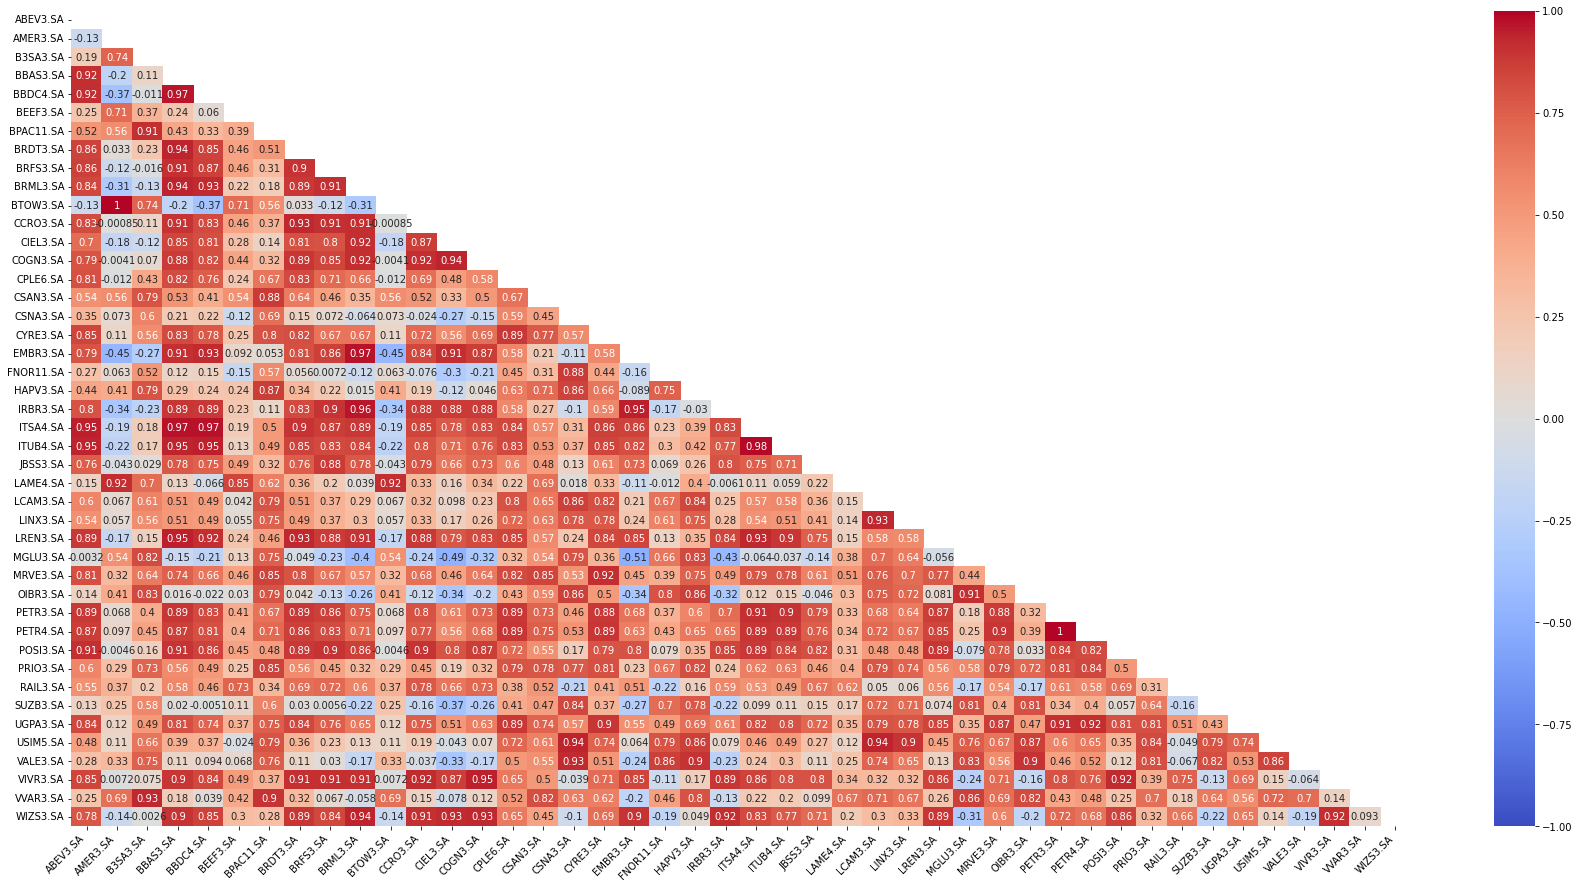

In [ ]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30,15))

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<p>O coeficiente de correlação vai de -1 a 1. Quando próximo de 1 significa que há uma correlação positiva forte, ou seja, quando uma ação BTOW3.SA subir ela tende a subir junto com uma ação AMER3.SA que possui uma correlação extremamente forte com ela (ou também PETR4.SA com PETR3.SA). Quando o coeficiente é próximo de -1 significa que é uma correlação negativa forte, ou seja, quando o valor de uma ação sobe, o valor de outra desce (como MGLU3.SA com EMBR3.SA). Enquanto o coeficiente próximo de 0 significa que não há nenhuma correlação linear (CCRO3.SA com AMER3.SA).</p>

In [ ]:
df_date_index = df2.copy()
df_date_index.set_index('Date', inplace=True)

Text(0, 0.5, 'Retorno EMBR3')

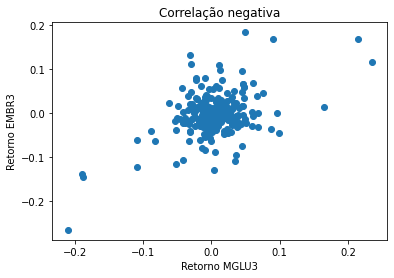

In [ ]:
retscomp = df_date_index.pct_change()
plt.title("Correlação negativa")
plt.scatter(retscomp["MGLU3.SA"], retscomp['EMBR3.SA'])
plt.xlabel("Retorno MGLU3")
plt.ylabel("Retorno EMBR3")

Text(0, 0.5, 'Retorno AMER3')

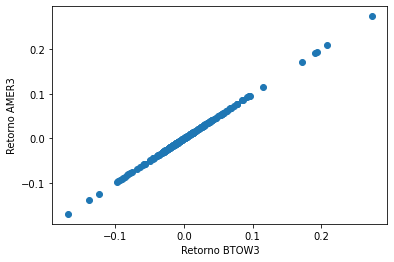

In [ ]:
plt.scatter(retscomp["BTOW3.SA"], retscomp['AMER3.SA'])
plt.xlabel("Retorno BTOW3")
plt.ylabel("Retorno AMER3")

Text(0, 0.5, 'Retorno AMER3')

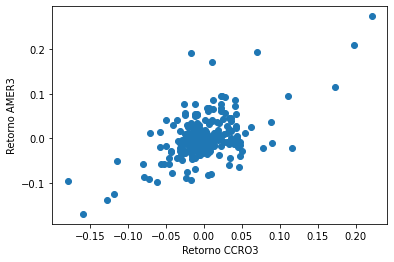

In [ ]:
plt.scatter(retscomp["CCRO3.SA"], retscomp['AMER3.SA'])
plt.xlabel("Retorno CCRO3")
plt.ylabel("Retorno AMER3")

<h2>Análise gráfica</h2>

<h3>Performance de cada ação</h3>

<p>Observar o desempenho positivo da CSNA3.SA, OIBR3.SA, FNOR11.SA, e o desempenho negativo da IRBR3.SA, EMBR3.SA, BRML3.SA (ambas estabilizaram no valor da queda). Quase todas ações tiveram uma queda no inicio da pandemia no Brasil, algumas voltaram ao seu valor normal, outras acima, e algumas se mantiveram no valor de queda ou menos.</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa26bc1950>,
      dtype=object)

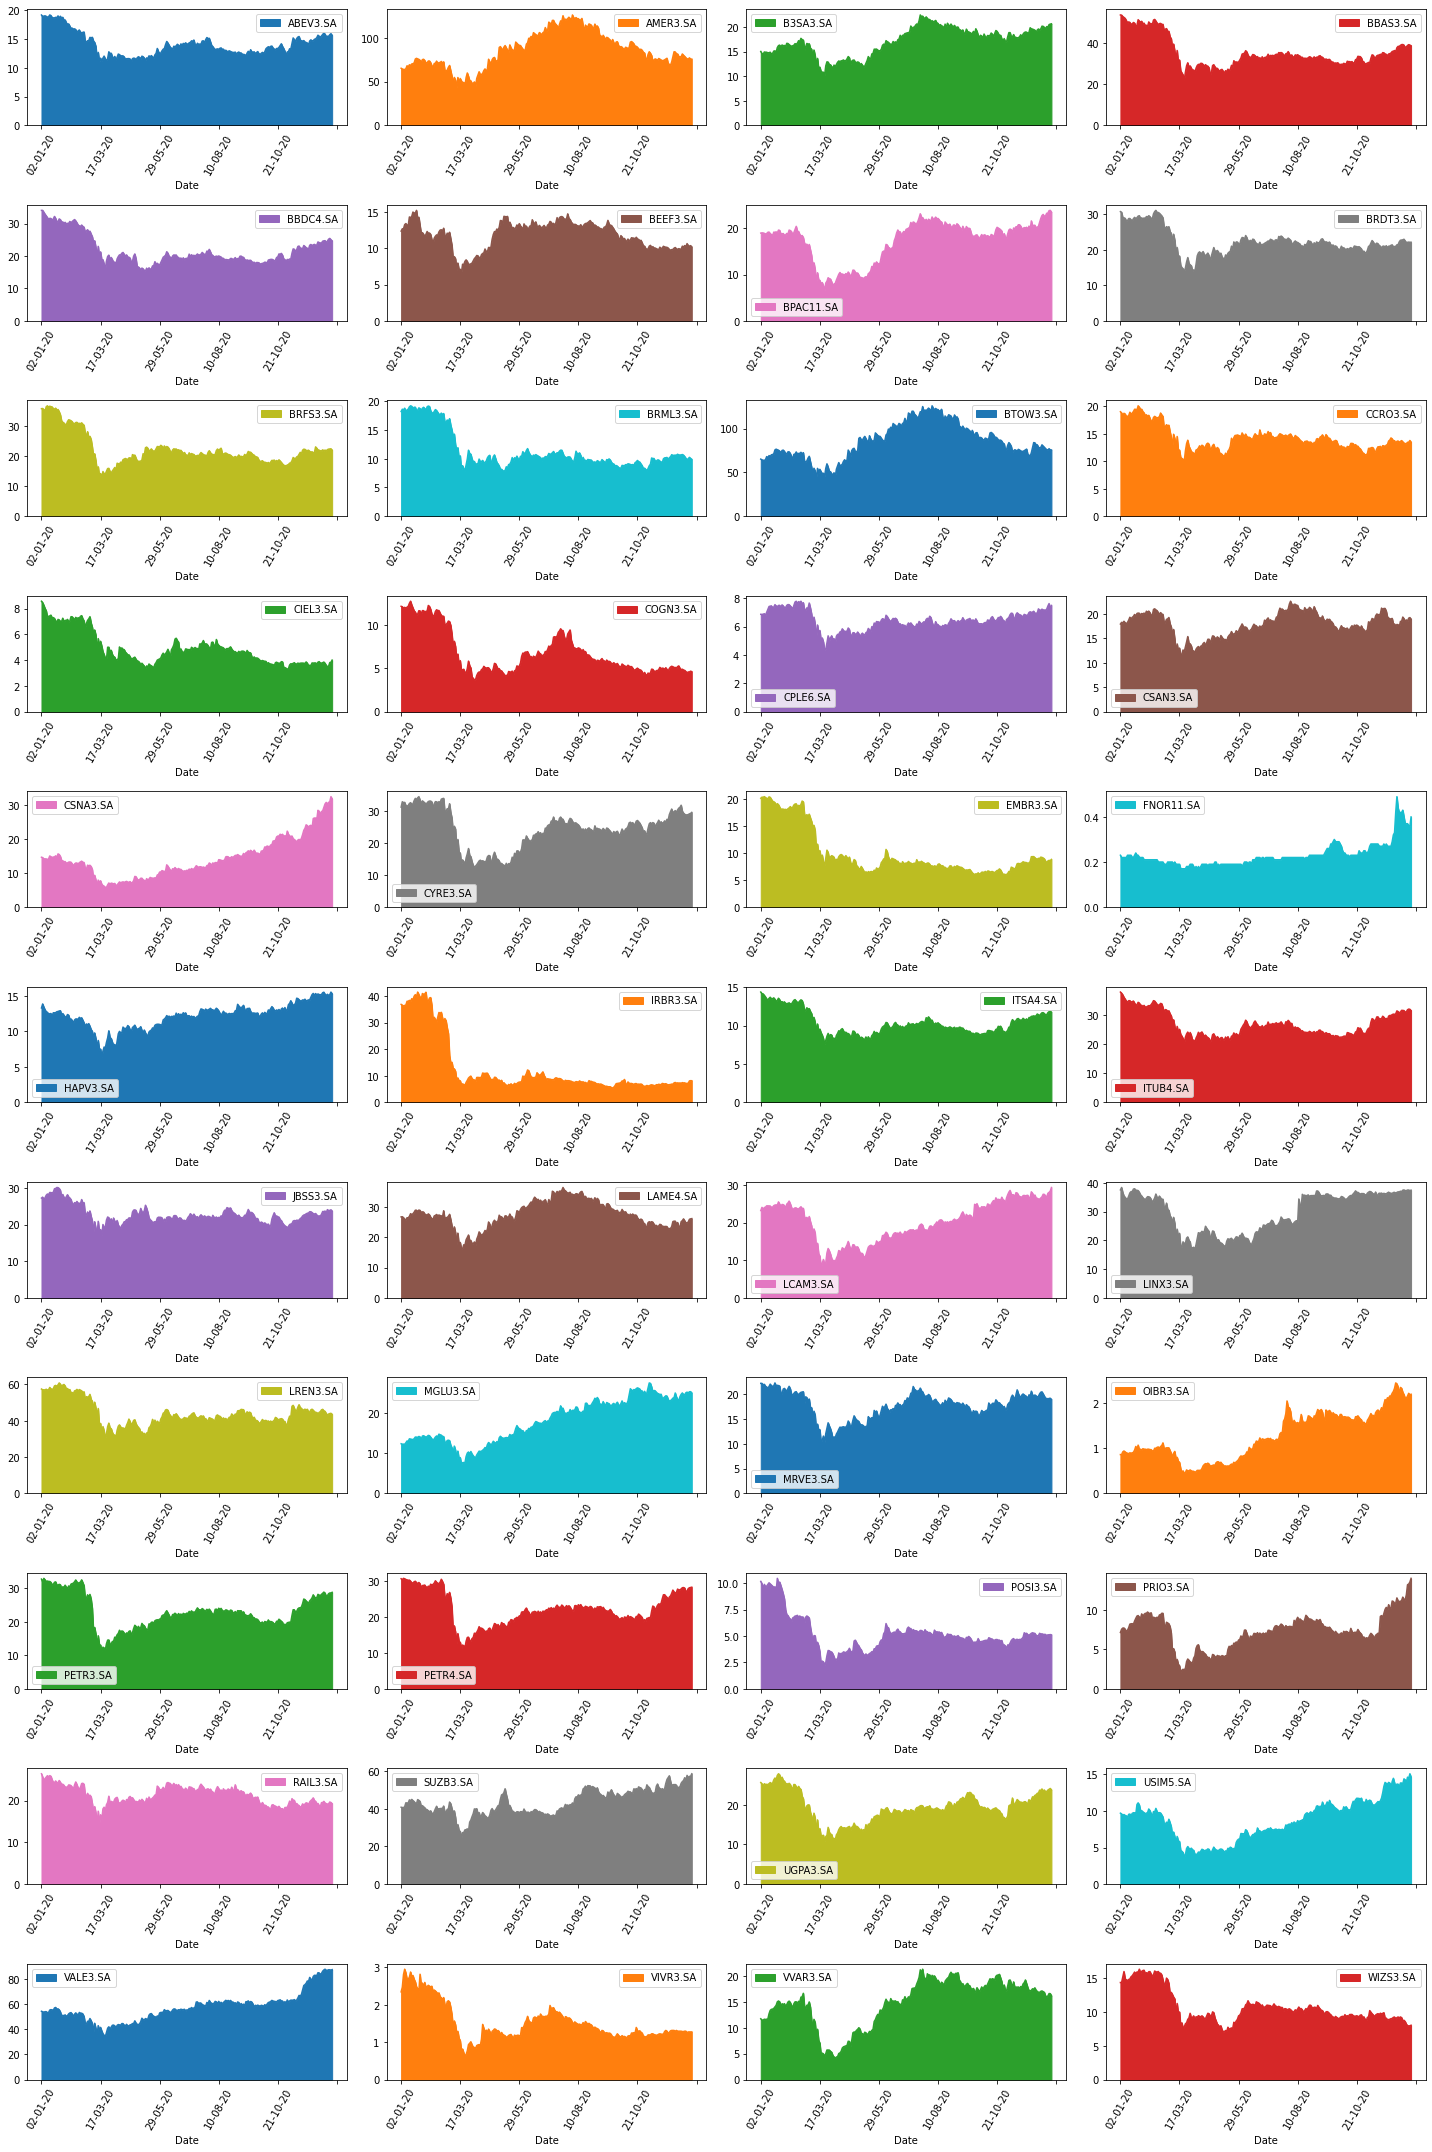

In [ ]:
fig, a = plt.subplots(11, 4, figsize=(20, 30), tight_layout=True)
df_date_index.plot.area(ax=a, subplots=True, rot=60)

<h2>Média móvel - determinar a tendência</h2>
<p>A média móvel suaviza o preço criando um preço médio constantemente atualizado. É interessante para remover alguns "ruídos" do gráfico de preços. Além de que, essa média móvel pode atuar como uma "resistência", ou seja, das tendências de alta e baixa pode se esperar que seguirá a tendência e não desvie do ponto de resistência.</p>

In [ ]:
df_test = df2.melt(id_vars=["Date"], var_name="Acao", value_name="Valor") # Colunas com nome de ações viram uma coluna unica, e cada ação vira um valor, estrutura do dataframe agora é Date, Ação, Valor
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d-%m-%y')
df_test.set_index('Date', inplace=True)
df_test

Acao       Valor
Date                             
2020-01-02   ABEV3.SA   19.200001
2020-01-03   ABEV3.SA   18.930000
2020-01-06   ABEV3.SA   19.020000
2020-01-07   ABEV3.SA   19.059999
2020-01-08   ABEV3.SA   18.969999
2020-01-09   ABEV3.SA   18.820000
2020-01-10   ABEV3.SA   18.889999
2020-01-13   ABEV3.SA   19.209999
2020-01-14   ABEV3.SA   19.100000
2020-01-15   ABEV3.SA   18.760000
2020-01-16   ABEV3.SA   18.700001
2020-01-17   ABEV3.SA   18.700001
2020-01-20   ABEV3.SA   18.799999
2020-01-21   ABEV3.SA   18.740000
2020-01-22   ABEV3.SA   19.049999
2020-01-23   ABEV3.SA   18.650000
2020-01-24   ABEV3.SA   18.990000
2020-01-27   ABEV3.SA   18.549999
2020-01-28   ABEV3.SA   18.799999
2020-01-29   ABEV3.SA   18.299999
2020-01-30   ABEV3.SA   18.340000
2020-01-31   ABEV3.SA   17.850000
2020-02-03   ABEV3.SA   17.590000
2020-02-04   ABEV3.SA   17.650000
2020-02-05   ABEV3.SA   17.250000
2020-02-06   ABEV3.SA   16.870001
2020-02-07   ABEV3.SA   16.920000
2020-02-10   ABEV3.SA   16.730000
2020-02-11   ABEV3.SA   16.799999
2020-02-12   ABEV3.SA   16.650000
2020-02-13   ABEV3.SA   16.270000
2020-02-14   ABEV3.SA   16.410000
2020-02-17   ABEV3.SA   16.600000
2020-02-18   ABEV3.SA   16.180000
2020-02-19   ABEV3.SA   16.129999
2020-02-20   ABEV3.SA   16.170000
2020-02-21   ABEV3.SA   16.250000
2020-02-27   ABEV3.SA   14.500000
2020-02-28   ABEV3.SA   14.540000
2020-03-02   ABEV3.SA   14.720000
2020-03-03   ABEV3.SA   14.740000
2020-03-04   ABEV3.SA   15.310000
2020-03-05   ABEV3.SA   15.230000
2020-03-06   ABEV3.SA   15.320000
2020-03-09   ABEV3.SA   14.670000
2020-03-10   ABEV3.SA   14.420000
2020-03-11   ABEV3.SA   13.750000
2020-03-12   ABEV3.SA   11.580000
2020-03-13   ABEV3.SA   12.700000
2020-03-16   ABEV3.SA   11.030000
2020-03-17   ABEV3.SA   11.690000
2020-03-18   ABEV3.SA   11.190000
2020-03-19   ABEV3.SA   11.700000
2020-03-20   ABEV3.SA   12.050000
2020-03-23   ABEV3.SA   11.510000
2020-03-24   ABEV3.SA   11.290000
2020-03-25   ABEV3.SA   11.650000
2020-03-26   ABEV3.SA   12.800000
2020-03-27   ABEV3.SA   12.490000
2020-03-30   ABEV3.SA   12.550000
2020-03-31   ABEV3.SA   11.920000
2020-04-01   ABEV3.SA   11.690000
2020-04-02   ABEV3.SA   11.990000
2020-04-03   ABEV3.SA   11.390000
2020-04-06   ABEV3.SA   11.860000
2020-04-07   ABEV3.SA   12.410000
2020-04-08   ABEV3.SA   12.310000
2020-04-09   ABEV3.SA   12.100000
2020-04-13   ABEV3.SA   12.100000
2020-04-14   ABEV3.SA   12.090000
2020-04-15   ABEV3.SA   11.910000
2020-04-16   ABEV3.SA   11.450000
2020-04-17   ABEV3.SA   11.600000
2020-04-20   ABEV3.SA   11.610000
2020-04-22   ABEV3.SA   11.620000
2020-04-23   ABEV3.SA   11.550000
2020-04-24   ABEV3.SA   11.110000
2020-04-27   ABEV3.SA   11.610000
2020-04-28   ABEV3.SA   11.700000
2020-04-29   ABEV3.SA   11.670000
2020-04-30   ABEV3.SA   11.340000
2020-05-04   ABEV3.SA   11.760000
2020-05-05   ABEV3.SA   11.940000
2020-05-06   ABEV3.SA   11.830000
2020-05-07   ABEV3.SA   11.540000
2020-05-08   ABEV3.SA   12.040000
2020-05-11   ABEV3.SA   11.940000
2020-05-12   ABEV3.SA   11.720000
2020-05-13   ABEV3.SA   11.260000
2020-05-14   ABEV3.SA   11.740000
2020-05-15   ABEV3.SA   11.640000
2020-05-18   ABEV3.SA   12.100000
2020-05-19   ABEV3.SA   11.940000
2020-05-20   ABEV3.SA   12.140000
2020-05-21   ABEV3.SA   11.880000
2020-05-22   ABEV3.SA   11.740000
2020-05-25   ABEV3.SA   12.270000
2020-05-26   ABEV3.SA   12.530000
2020-05-27   ABEV3.SA   13.380000
2020-05-28   ABEV3.SA   12.820000
2020-05-29   ABEV3.SA   12.480000
2020-06-01   ABEV3.SA   12.600000
2020-06-02   ABEV3.SA   12.970000
2020-06-03   ABEV3.SA   13.250000
2020-06-04   ABEV3.SA   13.380000
2020-06-05   ABEV3.SA   14.050000
2020-06-08   ABEV3.SA   14.600000
2020-06-09   ABEV3.SA   14.320000
2020-06-10   ABEV3.SA   13.960000
2020-06-12   ABEV3.SA   13.570000
2020-06-15   ABEV3.SA   13.430000
2020-06-16   ABEV3.SA   13.260000
2020-06-17   ABEV3.SA   13.770000
2020-06-18   ABEV3.SA   13.680000
2020-06-19   ABEV3.SA   13.840000
2020-06-22   ABEV3.SA   14.110000
2020-

<p>Será calculada a média móvel dos ultimos 50 dias (50 janelas) de preços de ações, e obterá a média para cada média móvel da janela.</p>

In [ ]:
def media_movel(acao):
  close_px = df_test[df_test.Acao == acao]['Valor']
  mavg = close_px.rolling(window=50).mean()
  mpl.rc('figure', figsize=(8, 7))
  mpl.__version__

  style.use('ggplot')

  close_px.plot(label=acao)
  mavg.plot(label='mavg')
  plt.legend()
  return close_px

<p>Foi escolhida a ação BTOW3.SA por causa do seu valor acima das demais, e alta variação dentro do período indo dos 65 reais até 126 (pico), e depois voltando aos 75.</p>

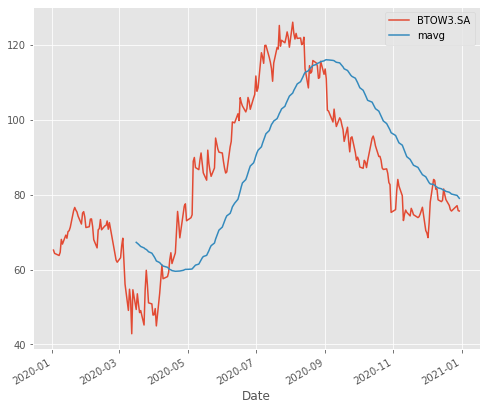

In [ ]:
close_px_btow3 = media_movel("BTOW3.SA")

<P>Este gráfico, da Média Móvel, nos mostra a tendência crescente de alta ou baixa do preço das ações. Dessa forma, podemos ter noção dos momentos de operação, como comprar quando as ações estiverem em baixa e vender quando as ações estiverem em alta. No caso BTOW3.SA está tendendo a baixa.</p>

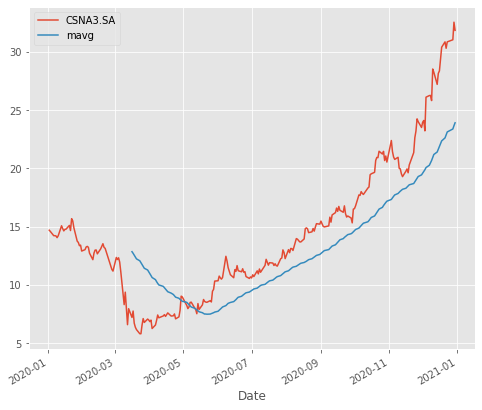

In [ ]:
close_px_csna3 = media_movel("CSNA3.SA") # ação que teve ótimo desempenho

<P>Tendendo a alta.</p>

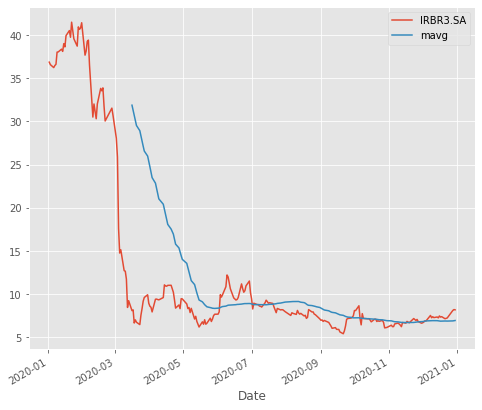

In [ ]:
close_px_irbr3 = media_movel("IRBR3.SA") # Teve um dos piores desempenhos

<p>Apresenta uma leve queda, mas parece manter uma certa constância.</p>

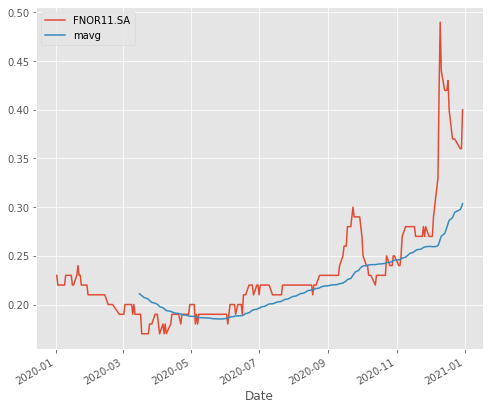

In [ ]:
close_px_fnor11 = media_movel("FNOR11.SA")

<P>Tendendo a alta.</p>

<h2>Desvio de retorno — para determinar o risco e o retorno</h2>
<p>Retorno Esperado usa a média, ou valor esperado, da distribuição de probabilidade dos retornos do investimento. O retorno esperado de uma carteira é calculado multiplicando o peso de cada ativo pelo seu retorno esperado e somando os valores de cada investimento — https://www.investopedia.com/terms/e/expectedreturn.asp.</p>

In [ ]:
def desvio_retorno(close_px):
  rets = close_px / close_px.shift(1) - 1
  rets.plot(label='return')

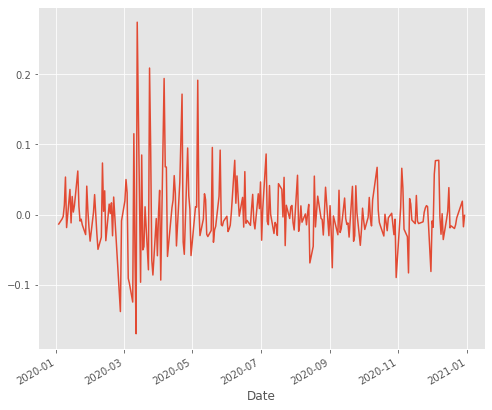

In [ ]:
desvio_retorno(close_px_btow3)

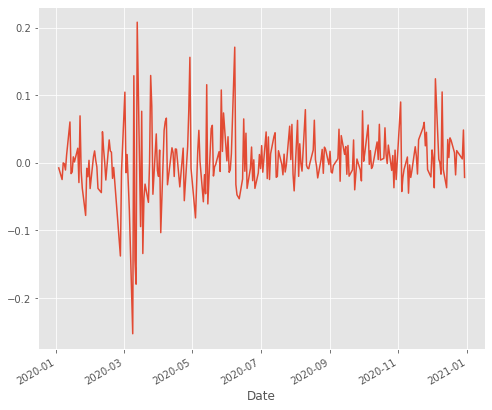

In [ ]:
desvio_retorno(close_px_csna3)

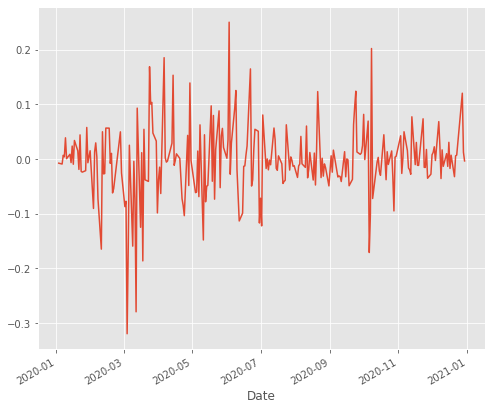

In [ ]:
desvio_retorno(close_px_irbr3)

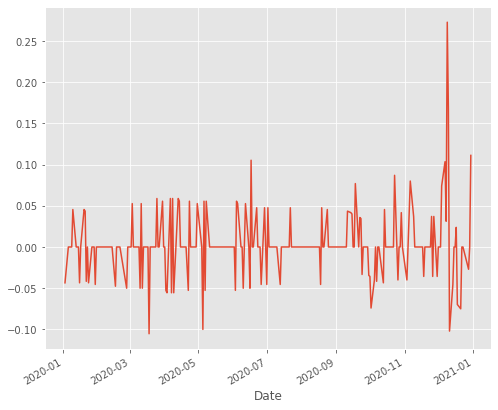

In [ ]:
desvio_retorno(close_px_fnor11)

<p>Obviamente, as ações ideais devem ter um retorno alto e estável. Nesses gráficos conseguimos notar que ações como da BTOW3.SA, IRBR3.SA e CSNA3.SA tiveram quedas de mais de 10% algumas vezes ao longo do ano, claro que tirando a IRBR3.SA, as outras duas tiveram momentos de alta que compensaram as quedas. Mas temos ações como o caso da FNOR11.SA, onde teve apenas dois momentos que ultrapassou minimamente a linha dos 10% de queda, mas sua valorização foi muito boa. </p>